In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


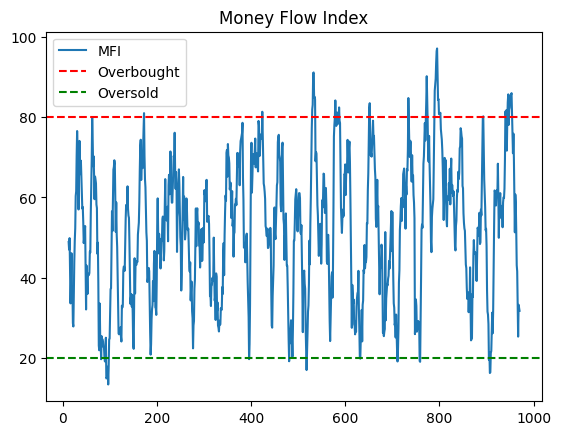

Price,Close,High,Low,Open,Volume,Typical_Price,Raw_Money_Flow,Price_Change,Pos_Flow,Neg_Flow,...,BB_SMA,BB_STD,Upper_Band,Lower_Band,MFI_Strategy,BB_Strategy,Full_Strategy,Strategy,Asset_Returns,Strategy_Returns
32,158.710007,174.654999,158.220001,174.449997,279700,163.861669,4.583211e+07,-11.181666,0.000000e+00,4.583211e+07,...,140.249000,17.839278,158.088278,122.409722,NaN,NaN,NaN,0,NaN,NaN
33,160.089996,166.460007,159.000000,159.000000,310400,161.850001,5.023824e+07,-2.011668,0.000000e+00,5.023824e+07,...,141.503500,18.326275,159.829775,123.177224,-1.0,-1.0,-2.0,-1,0.008695,-0.008695
34,160.289993,164.160004,158.600006,161.330002,303700,161.016668,4.890076e+07,-0.833333,0.000000e+00,4.890076e+07,...,142.843999,18.685502,161.529502,124.158497,0.0,-1.0,-1.0,0,0.009955,-0.008695
35,185.000000,185.850006,158.000000,158.570007,437400,176.283335,7.710633e+07,15.266668,7.710633e+07,0.000000e+00,...,145.518999,20.697243,166.216242,124.821757,0.0,0.0,0.0,0,0.165648,-0.008695
36,184.979996,191.500000,183.050003,185.199997,697700,186.510000,1.301280e+08,10.226664,1.301280e+08,0.000000e+00,...,148.459999,21.943170,170.403169,126.516829,0.0,-1.0,-1.0,0,0.165522,-0.008695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,513.369995,534.500000,512.000000,529.570007,691500,519.956665,3.595500e+08,-2.753337,0.000000e+00,3.595500e+08,...,518.642999,12.043593,530.686592,506.599406,0.0,0.0,0.0,0,2.234642,-0.248548
967,518.789978,523.325012,510.670013,515.000000,638100,517.595001,3.302774e+08,-2.361664,0.000000e+00,3.302774e+08,...,520.054999,10.070394,530.125393,509.984605,0.0,0.0,0.0,0,2.268792,-0.248548
968,522.989990,531.872986,518.000000,530.179993,741000,524.287659,3.884972e+08,6.692657,3.884972e+08,0.000000e+00,...,521.426498,8.264804,529.691303,513.161694,1.0,0.0,1.0,0,2.295255,-0.248548
969,512.950012,540.299988,510.882996,524.799988,929400,521.377665,4.845684e+08,-2.909993,0.000000e+00,4.845684e+08,...,521.895499,7.421271,529.316770,514.474227,0.0,0.0,0.0,0,2.231995,-0.248548


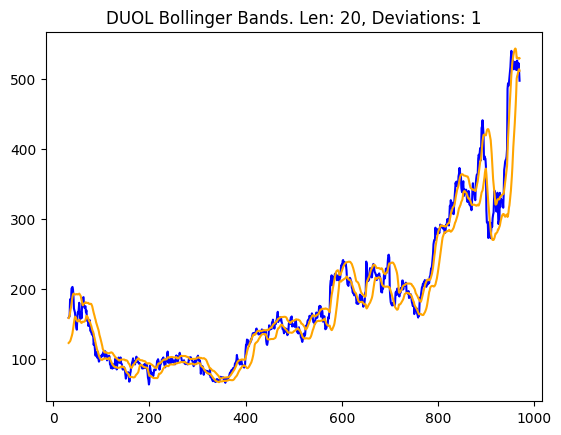

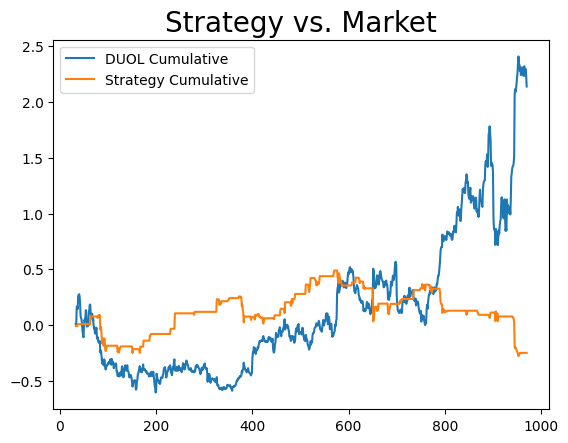

In [2]:
TICKER = 'DUOL'
INTERVAL='1d'

# set period based on interval
if INTERVAL == '1h':
    PERIOD = '730d'
else:
    PERIOD = 'max'

MFI_LENGTH = 14
OVERBOUGHT = 70
OVERSOLD = 30
BB_LEN = 20
DEVS = 1


# what subsetion of that data are you interested in
LOOKBACK = 10000

def get_data(ticker=TICKER, lookback=LOOKBACK, interval=INTERVAL):

    # get data at interval you want
    df = yf.download(ticker, interval=interval, period=PERIOD)
    df.columns = df.columns.get_level_values(0)

    # reset the index to make plots prettier
    df = df.reset_index(drop=True)

    # only return the subset of data you are interested in
    return df.iloc[-lookback:, :]

def add_MFI(df, length=14, overbought=80, oversold=20):
    df = df.copy()

    # Step 1: Calculate typical price
    df['Typical_Price'] = (df['High'] + df['Low'] + df['Close']) / 3

    # Step 2: Calculate raw money flow
    df['Raw_Money_Flow'] = df['Typical_Price'] * df['Volume']

    # Step 3: Classify positive/negative money flow
    df['Price_Change'] = df['Typical_Price'].diff()

    df['Pos_Flow'] = np.where(df['Price_Change'] > 0, df['Raw_Money_Flow'], 0)
    df['Neg_Flow'] = np.where(df['Price_Change'] < 0, df['Raw_Money_Flow'], 0)

    # Step 4: Money Flow Ratio and MFI
    pos_sum = df['Pos_Flow'].rolling(window=length).sum()
    neg_sum = df['Neg_Flow'].rolling(window=length).sum()
    mfr = pos_sum / neg_sum
    df['MFI'] = 100 - (100 / (1 + mfr))

    # Step 5: Plot
    plt.figure()
    plt.plot(df['MFI'], label='MFI')
    plt.axhline(overbought, color='red', linestyle='--', label='Overbought')
    plt.axhline(oversold, color='green', linestyle='--', label='Oversold')
    plt.title('Money Flow Index')
    plt.legend()
    plt.show()

    return df.dropna()

def add_MFI_strategy(df, overbought=OVERBOUGHT, oversold=OVERSOLD):

    df['MFI_Strategy'] = 0
    df['MFI_Strategy'] = np.where(df['MFI'] > overbought, -1, 
                     np.where(df['MFI'] < oversold, 1, 0))
    
    # shift back to make sure we have seen the signal
    df['MFI_Strategy'] = df['MFI_Strategy'].shift(1)
    return df

def add_BB(df, devs=DEVS, bb_len=BB_LEN):

    # can change to ema (use MACD video/code for reference)
    df['BB_SMA'] = df['Close'].rolling(bb_len).mean()

    # get the standard deviation of the close prices for the period
    df['BB_STD'] = df['Close'].rolling(bb_len).std()

    df['Upper_Band'] = df['BB_SMA'] + (devs * df['BB_STD'])
    df['Lower_Band'] = df['BB_SMA'] - (devs * df['BB_STD'])

    df = df.dropna()

    plt.figure()
    plt.plot(df['Close'], color='blue')
    plt.plot(df['Upper_Band'], color='orange')
    plt.plot(df['Lower_Band'], color='orange')

    plt.title(f'{TICKER} Bollinger Bands. Len: {BB_LEN}, Deviations: {DEVS}');

    return df

def add_BB_strategy(df):
    df['BB_Strategy'] = 0
    df['BB_Strategy'] = np.where(
        df['Close'] > df['Upper_Band'], -1, 
        np.where(df['Close'] < df['Lower_Band'], 1, 0)
        )
    
    df['BB_Strategy'] = df['BB_Strategy'].shift(1)
    
    return df

def add_full_strategy(df):

    df['Full_Strategy'] = df['BB_Strategy'] + df['MFI_Strategy']

    # adjust values for simplicity
    df['Strategy'] = np.where(df['Full_Strategy'] == 2, 1, 
                     np.where(df['Full_Strategy'] == -2, -1, 0))

    return df

def test_strategy(df):

    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative', 'Strategy Cumulative'])
    plt.title('Strategy vs. Market', size='20')

    return df

def main():
    df = get_data()
    df = add_MFI(df)
    df = add_BB(df)
    df = add_MFI_strategy(df)
    df = add_BB_strategy(df)
    df = add_full_strategy(df)
    df = test_strategy(df)

    return df

df = main()
df